In [1]:
#Import all labrabirs which you want to need to solved project.
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import numpy as np
from sklearn.model_selection import KFold
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#Read file.
ld=pd.read_csv('loans data.csv')

In [3]:
#First top 5 rows
ld.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,99592.0,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,80059.0,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,15825.0,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,33182.0,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0.0,9 years


In [4]:
#last 5 rows
ld.tail()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
2495,23735.0,30000,29950,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15,45880,1.0,8 years
2496,65882.0,16000,16000,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18,18898,1.0,10+ years
2497,55610.0,10000,10000,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4,4544,0.0,10+ years
2498,38576.0,6000,6000,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8,.,0.0,5 years
2499,3116.0,9000,5242.75,13.79%,36 months,debt_consolidation,6.76%,NY,RENT,3875.00,670-674,7,7589,0.0,10+ years


In [5]:
# All rows and columns
ld.shape
print("Rows = ",ld.shape[0])
print("Columns = ",ld.shape[1])

Rows =  2500
Columns =  15


In [6]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount.Requested                2499 non-null   object 
 2   Amount.Funded.By.Investors      2499 non-null   object 
 3   Interest.Rate                   2500 non-null   object 
 4   Loan.Length                     2499 non-null   object 
 5   Loan.Purpose                    2499 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2499 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2497 non-null   float64
 10  FICO.Range                      2500 non-null   object 
 11  Open.CREDIT.Lines               2496 non-null   object 
 12  Revolving.CREDIT.Balance        24

In [7]:
ld.describe

<bound method NDFrame.describe of            ID Amount.Requested Amount.Funded.By.Investors Interest.Rate  \
0     81174.0            20000                      20000         8.90%   
1     99592.0            19200                      19200        12.12%   
2     80059.0            35000                      35000        21.98%   
3     15825.0            10000                       9975         9.99%   
4     33182.0            12000                      12000        11.71%   
...       ...              ...                        ...           ...   
2495  23735.0            30000                      29950        16.77%   
2496  65882.0            16000                      16000        14.09%   
2497  55610.0            10000                      10000        13.99%   
2498  38576.0             6000                       6000        12.42%   
2499   3116.0             9000                    5242.75        13.79%   

     Loan.Length        Loan.Purpose Debt.To.Income.Ratio State  

In [8]:
ld.isnull().sum()

ID                                 1
Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
State                              1
Home.Ownership                     1
Monthly.Income                     3
FICO.Range                         0
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 78
dtype: int64

In [9]:
ld["Employment.Length"].unique()

array(['< 1 year', '2 years', '5 years', '9 years', '3 years',
       '10+ years', '8 years', '6 years', '1 year', '7 years', '.',
       '4 years', nan], dtype=object)

In [10]:
for col in ["Interest.Rate","Debt.To.Income.Ratio","Employment.Length"]:
    ld[col]=ld[col].astype("str")
    ld[col]=[x.replace("%","") for x in ld[col]]
    ld[col]=[x.replace("year","") for x in ld[col]]
    ld[col]=[x.replace("s","") for x in ld[col]] 
    ld[col]=[x.replace("n/a", "< 1") for x in ld[col]]
    ld[col]=[x.replace("10+","11") for x in ld[col]]
    ld[col]=[x.replace("< 1","0") for x in ld[col]]

In [11]:
ld.head(2500)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,0
1,99592.0,19200,19200,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2
2,80059.0,35000,35000,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2
3,15825.0,10000,9975,9.99,36 months,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5
4,33182.0,12000,12000,11.71,36 months,credit_card,18.78,NJ,RENT,3195.00,695-699,11,14469,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,23735.0,30000,29950,16.77,60 months,debt_consolidation,19.23,NY,MORTGAGE,9250.00,705-709,15,45880,1.0,8
2496,65882.0,16000,16000,14.09,60 months,home_improvement,21.54,MD,OWN,8903.25,740-744,18,18898,1.0,11
2497,55610.0,10000,10000,13.99,36 months,debt_consolidation,4.89,PA,MORTGAGE,2166.67,680-684,4,4544,0.0,11
2498,38576.0,6000,6000,12.42,36 months,major_purchase,16.66,NJ,RENT,3500.00,675-679,8,.,0.0,5


In [12]:
ld.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [13]:
ld.shape

(2500, 15)

In [14]:
ld.isnull().sum()

ID                                1
Amount.Requested                  1
Amount.Funded.By.Investors        1
Interest.Rate                     0
Loan.Length                       1
Loan.Purpose                      1
Debt.To.Income.Ratio              0
State                             1
Home.Ownership                    1
Monthly.Income                    3
FICO.Range                        0
Open.CREDIT.Lines                 4
Revolving.CREDIT.Balance          3
Inquiries.in.the.Last.6.Months    3
Employment.Length                 0
dtype: int64

In [15]:
ld.isnull().sum().sum()

20

In [16]:
# some characters values in those columns in the files. We'll convert all such columns to numbers . like(.)convert to blank
for col in ["Amount.Requested","Amount.Funded.By.Investors","Open.CREDIT.Lines","Revolving.CREDIT.Balance",
           "Inquiries.in.the.Last.6.Months","Interest.Rate","Debt.To.Income.Ratio","Employment.Length"]:
    ld[col]=pd.to_numeric(ld[col],errors="coerce")

In [17]:
ld.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
dtype: object

In [18]:
ld.to_csv('Cleaned_Data.csv')

In [19]:
##Univarite Analysis 
#Value count
cat_columns = ['Loan.Length',"Loan.Purpose","State","Home.Ownership","Employment.Length"]
for i in cat_columns:
    print(i)
    print(ld[i].value_counts())
    print("***************************")

Loan.Length
36 months    1950
60 months     548
.               1
Name: Loan.Length, dtype: int64
***************************
Loan.Purpose
debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64
***************************
State
CA    433
NY    255
TX    174
FL    169
IL    101
GA     97
PA     96
NJ     94
VA     78
MA     73
OH     71
MD     68
NC     64
CO     61
WA     58
CT     50
AZ     46
MI     45
MN     38
AL     38
MO     33
NV     32
OR     30
SC     28
WI     26
KY     23
LA     22
OK     21
KS     21
UT     16
NH     15
RI     15
WV     14
AR     13
NM     13
HI     12
AK     11
DC     11
DE      8
MT      7
VT      5
SD    

In [20]:
### Bivariate Analysis 
# Group by with avarage interest rate of 'Loan.Length',"Loan.Purpose","State","Home.Ownership","Employment.Length"
cat_columns = ['Loan.Length',"Loan.Purpose","State","Home.Ownership","Employment.Length"]
for i in cat_columns: 
    print(round(ld.groupby(i)['Interest.Rate'].mean()))
    print("*****************************************************************")

Loan.Length
.            14.0
36 months    12.0
60 months    16.0
Name: Interest.Rate, dtype: float64
*****************************************************************
Loan.Purpose
car                   11.0
credit_card           13.0
debt_consolidation    14.0
educational           11.0
home_improvement      12.0
house                 13.0
major_purchase        11.0
medical               12.0
moving                14.0
other                 13.0
renewable_energy      10.0
small_business        13.0
vacation              12.0
wedding               12.0
Name: Interest.Rate, dtype: float64
*****************************************************************
State
.     15.0
AK    17.0
AL    13.0
AR    13.0
AZ    13.0
CA    13.0
CO    13.0
CT    14.0
DC    14.0
DE    12.0
FL    13.0
GA    13.0
HI    16.0
IA    14.0
IL    13.0
IN    13.0
KS    14.0
KY    12.0
LA    15.0
MA    13.0
MD    13.0
MI    14.0
MN    14.0
MO    13.0
MS    16.0
MT    11.0
NC    13.0
NH    12.0
NJ    13.0
NM    14.0
NV 

In [21]:
ld["Loan.Length"].unique()

array(['36 months', '60 months', '.', nan], dtype=object)

In [22]:
#we can then choose and drop the dummies that we want to drop and attach the ones selected back to our original data.

ll_dummies=pd.get_dummies(ld["Loan.Length"])

In [23]:
ll_dummies.head()

,.,36 months,60 months
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [24]:
#We'll add dummy variable for "36 months" to our data and ignore the rest two.
ld["LL_36"]=ll_dummies["36 months"]

In [25]:
#Now that we have created dummies for Loan.Length, we need to remove this from the dataframe.
ld=ld.drop('Loan.Length',axis=1)

In [26]:
ld.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
LL_36                               uint8
dtype: object

In [27]:
#Next we examine variable "Loan.Purpose"
ld["Loan.Purpose"].value_counts()

debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

In [28]:
#campare with interest rate and common interest rate will be make group 
round(ld.groupby("Loan.Purpose")["Interest.Rate"].mean())

Loan.Purpose
car                   11.0
credit_card           13.0
debt_consolidation    14.0
educational           11.0
home_improvement      12.0
house                 13.0
major_purchase        11.0
medical               12.0
moving                14.0
other                 13.0
renewable_energy      10.0
small_business        13.0
vacation              12.0
wedding               12.0
Name: Interest.Rate, dtype: float64

In [29]:
#We can see from the table above that there are 4 effective categoris in the data. Lets club them
for i in range(len(ld.index)):#    ld.index is index start=0 & stop=2500.
    if ld["Loan.Purpose"][i] in ["car","educational","major_purchase"]:
        ld.loc[i,"Loan.Purpose"]="cem"
    if ld["Loan.Purpose"][i] in ["home_improvement","medical","vacation","wedding"]:
        ld.loc[i,"Loan.Purpose"]="hmvw"
    if ld["Loan.Purpose"][i] in ["credit_card","house","other","small_business"]:
        ld.loc[i,"Loan.Purpose"]="chos"
    if ld["Loan.Purpose"][i] in ["debt_consolidation","moving"]:
        ld.loc[i,"Loan.Purpose"]="dm"

In [30]:
ld['Loan.Purpose'].value_counts()

dm                  1336
chos                 751
hmvw                 242
cem                  166
renewable_energy       4
Name: Loan.Purpose, dtype: int64

In [31]:
#Now we make dummies for this variable
lp_dummies=pd.get_dummies(ld["Loan.Purpose"],prefix="LP")

In [32]:
lp_dummies.head()

,LP_cem,LP_chos,LP_dm,LP_hmvw,LP_renewable_energy
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [33]:
#We'll add this data to original data. And then drop original variable "Loan.Purpose" and one of the dummies "LP_renewable_energy"
ld=pd.concat([ld,lp_dummies],1)
ld=ld.drop(["Loan.Purpose","LP_renewable_energy"],1)

C:\Users\Nikita Meta\AppData\Local\Temp\ipykernel_7052\534062641.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  ld=pd.concat([ld,lp_dummies],1)
C:\Users\Nikita Meta\AppData\Local\Temp\ipykernel_7052\534062641.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ld=ld.drop(["Loan.Purpose","LP_renewable_energy"],1)


In [34]:
ld.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
LL_36                               uint8
LP_cem                              uint8
LP_chos                             uint8
LP_dm                               uint8
LP_hmvw                             uint8
dtype: object

In [35]:
#Next we take care of variable Home.Ownership.
ld["Home.Ownership"].value_counts()

MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

In [36]:
ld["ho_mort"]=np.where(ld["Home.Ownership"]=="MORTGAGE",1,0)
ld["ho_rent"]=np.where(ld["Home.Ownership"]=="RENT",1,0)
ld=ld.drop(["Home.Ownership"],1)

C:\Users\Nikita Meta\AppData\Local\Temp\ipykernel_7052\3624989425.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ld=ld.drop(["Home.Ownership"],1)


In [37]:
ld.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,State,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,LL_36,LP_cem,LP_chos,LP_dm,LP_hmvw,ho_mort,ho_rent
0,81174.0,20000.0,20000.0,8.90,14.90,SC,6541.67,735-739,14.0,14272.0,2.0,0.0,1,0,0,1,0,1,0
1,99592.0,19200.0,19200.0,12.12,28.36,TX,4583.33,715-719,12.0,11140.0,1.0,2.0,1,0,0,1,0,1,0
2,80059.0,35000.0,35000.0,21.98,23.81,CA,11500.00,690-694,14.0,21977.0,1.0,2.0,0,0,0,1,0,1,0
3,15825.0,10000.0,9975.0,9.99,14.30,KS,3833.33,695-699,10.0,9346.0,0.0,5.0,1,0,0,1,0,1,0
4,33182.0,12000.0,12000.0,11.71,18.78,NJ,3195.00,695-699,11.0,14469.0,0.0,9.0,1,0,1,0,0,0,1


In [38]:
#If you look at first few values of variable FICO.Range , you can see that we can convert it to numeric by taking average of the range given. To do that first we need to split the column with "-", so that we can have both end of ranges in separate columns and then we can simply average them.
#Lets first split.

In [39]:
ld['f1'], ld['f2'] = zip(*ld['FICO.Range'].apply(lambda x: x.split('-', 1)))

In [40]:
# Now we create new variable "fico" by averaging f1 and f2. And then we'll drop the original variable FICO.Range and f1,f2.   
ld["fico"]=0.5*(pd.to_numeric(ld["f1"])+pd.to_numeric(ld["f2"]))

ld=ld.drop(["FICO.Range","f1","f2"],1)

C:\Users\Nikita Meta\AppData\Local\Temp\ipykernel_7052\348668705.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ld=ld.drop(["FICO.Range","f1","f2"],1)


In [41]:
ld.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Debt.To.Income.Ratio              float64
State                              object
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
LL_36                               uint8
LP_cem                              uint8
LP_chos                             uint8
LP_dm                               uint8
LP_hmvw                             uint8
ho_mort                             int32
ho_rent                             int32
fico                              float64
dtype: object

In [42]:
ld=ld.drop(["State"],1)

C:\Users\Nikita Meta\AppData\Local\Temp\ipykernel_7052\2351392451.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ld=ld.drop(["State"],1)


In [43]:
ld.isnull().sum()

ID                                 1
Amount.Requested                   5
Amount.Funded.By.Investors         5
Interest.Rate                      0
Debt.To.Income.Ratio               1
Monthly.Income                     3
Open.CREDIT.Lines                  9
Revolving.CREDIT.Balance           5
Inquiries.in.the.Last.6.Months     3
Employment.Length                 80
LL_36                              0
LP_cem                             0
LP_chos                            0
LP_dm                              0
LP_hmvw                            0
ho_mort                            0
ho_rent                            0
fico                               0
dtype: int64

In [44]:
ld.isnull().sum().sum()

112

In [45]:
interpolate=["Amount.Funded.By.Investors","Amount.Requested","Debt.To.Income.Ratio","Monthly.Income","Open.CREDIT.Lines","Revolving.CREDIT.Balance","Inquiries.in.the.Last.6.Months"]

In [46]:
ld[interpolate]=ld[interpolate].interpolate(method='linear')

In [47]:
ld=ld.drop(["ID"],1)

C:\Users\Nikita Meta\AppData\Local\Temp\ipykernel_7052\30879425.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ld=ld.drop(["ID"],1)


In [72]:
ld.dtypes

Amount.Requested                  float64
Interest.Rate                     float64
Debt.To.Income.Ratio              float64
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
LL_36                               uint8
LP_cem                              uint8
LP_chos                             uint8
LP_dm                               uint8
LP_hmvw                             uint8
ho_mort                             int32
ho_rent                             int32
fico                              float64
dtype: object

In [48]:
columns = ["Amount.Requested","Amount.Funded.By.Investors","Interest.Rate","Debt.To.Income.Ratio","Monthly.Income","Open.CREDIT.Lines",
          "Revolving.CREDIT.Balance","Inquiries.in.the.Last.6.Months"]

Amount.Requested
Amount.Funded.By.Investors
Interest.Rate
Debt.To.Income.Ratio
Monthly.Income
Open.CREDIT.Lines
Revolving.CREDIT.Balance
Inquiries.in.the.Last.6.Months


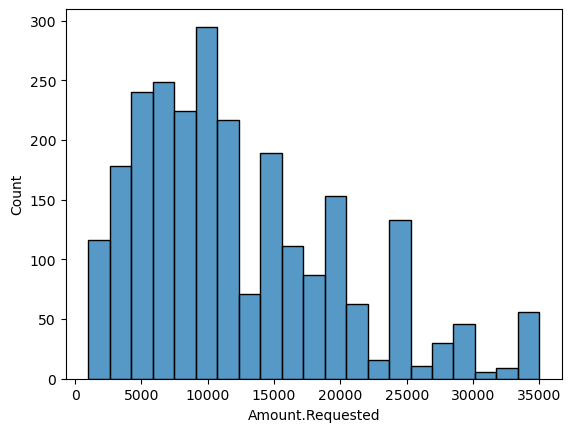

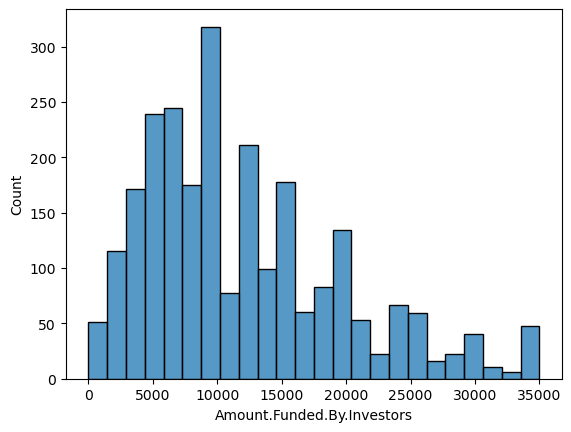

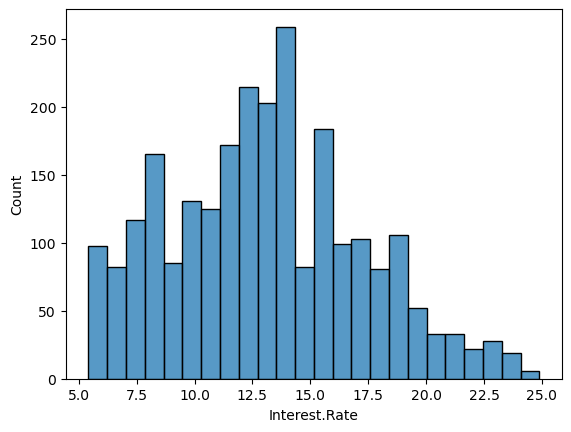

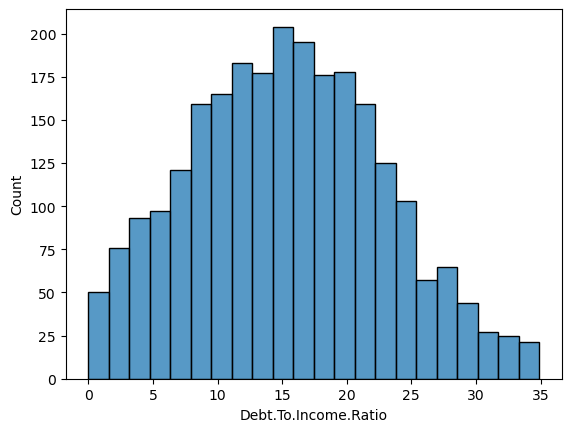

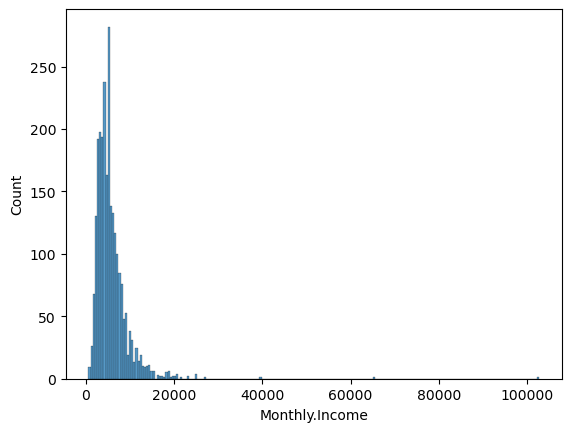

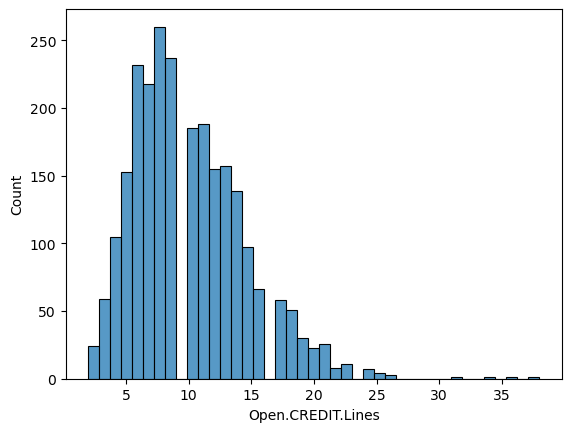

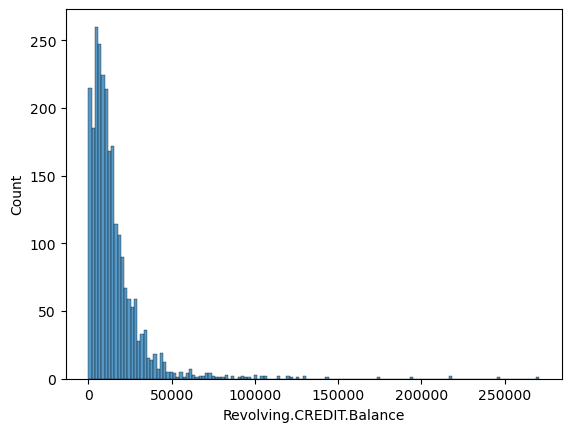

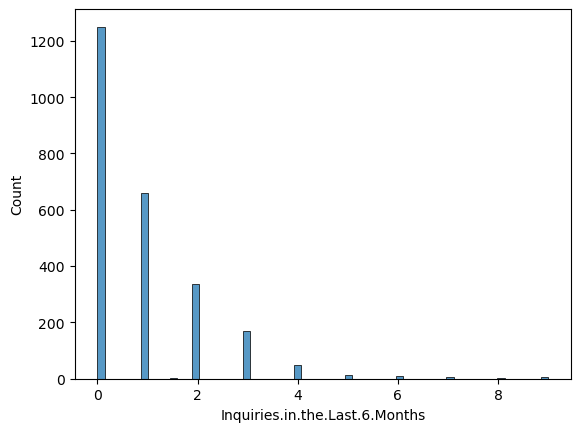

In [49]:
# Plot histogram
for i in columns:
    plt.figure(i)
    print(i)
    sns.histplot(data = ld[i])
    plt.savefig(i+'.png')

Amount.Requested
Amount.Funded.By.Investors
Interest.Rate
Debt.To.Income.Ratio
Monthly.Income
Open.CREDIT.Lines
Revolving.CREDIT.Balance
Inquiries.in.the.Last.6.Months


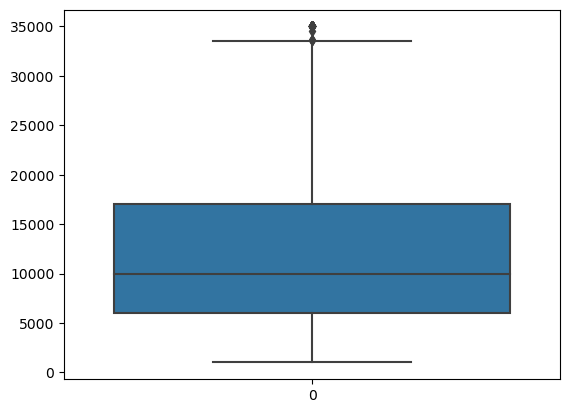

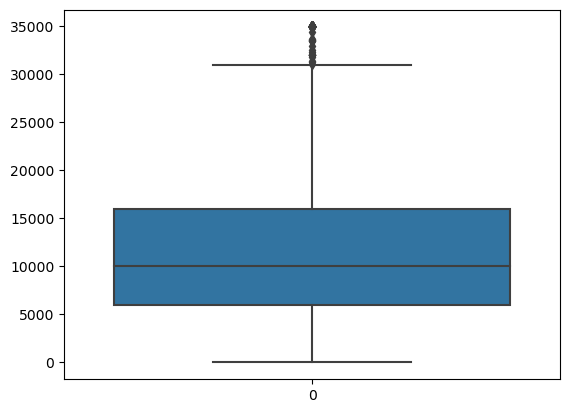

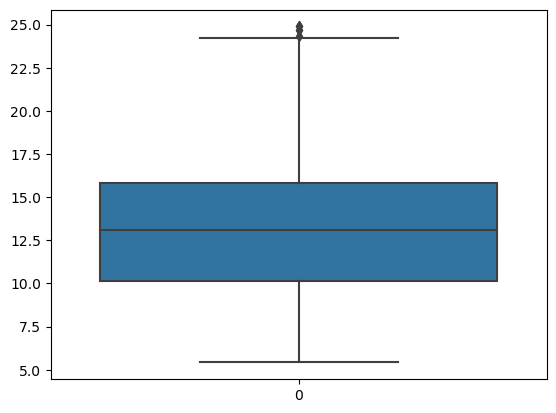

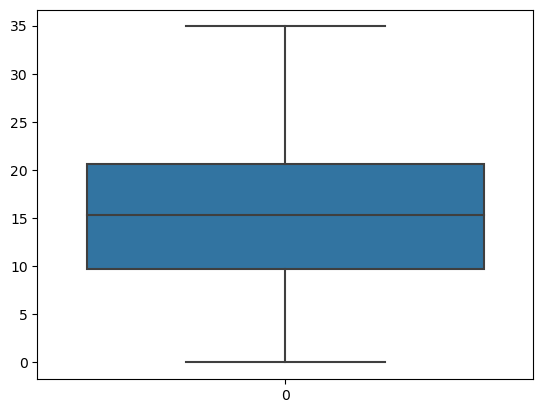

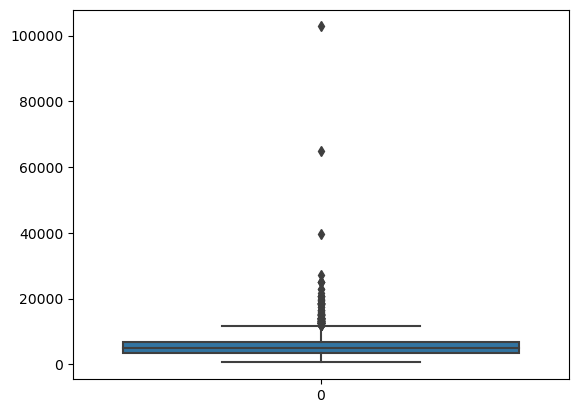

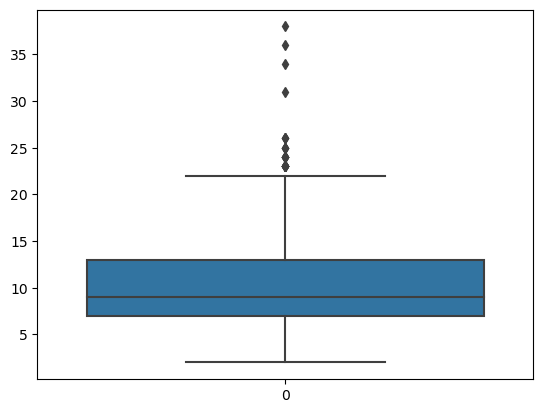

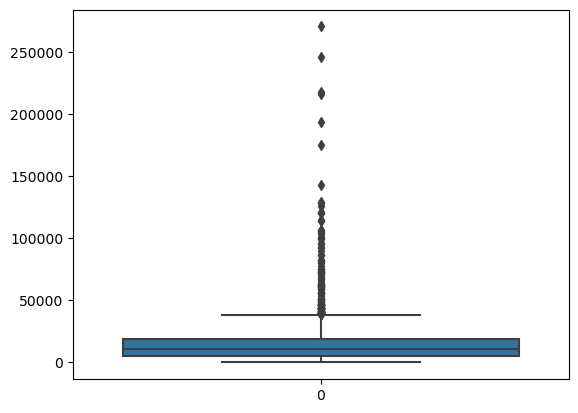

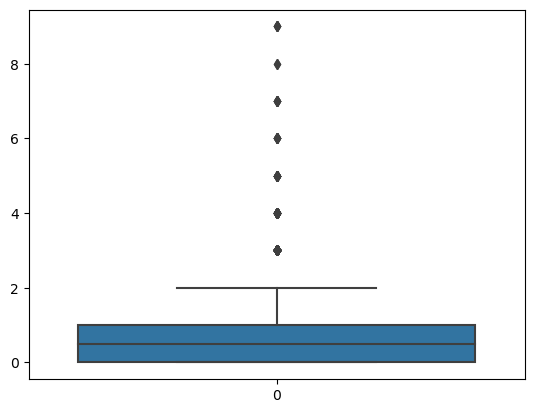

In [50]:
# Plot boxplot
for i in columns:
    plt.figure(i)
    print(i)
    sns.boxplot(data = ld[i])
    plt.savefig(i+'.png')

In [51]:
ld["Employment.Length"]=ld["Employment.Length"].interpolate(method='linear')

In [52]:
ld.isnull().sum()

Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Debt.To.Income.Ratio              0
Monthly.Income                    0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
LL_36                             0
LP_cem                            0
LP_chos                           0
LP_dm                             0
LP_hmvw                           0
ho_mort                           0
ho_rent                           0
fico                              0
dtype: int64

In [53]:
ld.shape

(2500, 17)

In [54]:
ld.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,LL_36,LP_cem,LP_chos,LP_dm,LP_hmvw,ho_mort,ho_rent,fico
0,20000.0,20000.0,8.90,14.90,6541.67,14.0,14272.0,2.0,0.0,1,0,0,1,0,1,0,737.0
1,19200.0,19200.0,12.12,28.36,4583.33,12.0,11140.0,1.0,2.0,1,0,0,1,0,1,0,717.0
2,35000.0,35000.0,21.98,23.81,11500.00,14.0,21977.0,1.0,2.0,0,0,0,1,0,1,0,692.0
3,10000.0,9975.0,9.99,14.30,3833.33,10.0,9346.0,0.0,5.0,1,0,0,1,0,1,0,697.0
4,12000.0,12000.0,11.71,18.78,3195.00,11.0,14469.0,0.0,9.0,1,0,1,0,0,0,1,697.0


In [55]:
ld=ld.drop(["Amount.Funded.By.Investors"],1)

C:\Users\Nikita Meta\AppData\Local\Temp\ipykernel_7052\3237653556.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ld=ld.drop(["Amount.Funded.By.Investors"],1)


In [56]:
#We now split our data into two random parts . One to build model on , Another to test its performance. Option "random_state" is used to make our random operation reproducible.

In [57]:
ld_train, ld_test = train_test_split(ld, test_size = 0.2,random_state=2)

In [58]:
lm=LinearRegression()

In [59]:
ld.head()

,Amount.Requested,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,LL_36,LP_cem,LP_chos,LP_dm,LP_hmvw,ho_mort,ho_rent,fico
0,20000.0,8.90,14.90,6541.67,14.0,14272.0,2.0,0.0,1,0,0,1,0,1,0,737.0
1,19200.0,12.12,28.36,4583.33,12.0,11140.0,1.0,2.0,1,0,0,1,0,1,0,717.0
2,35000.0,21.98,23.81,11500.00,14.0,21977.0,1.0,2.0,0,0,0,1,0,1,0,692.0
3,10000.0,9.99,14.30,3833.33,10.0,9346.0,0.0,5.0,1,0,0,1,0,1,0,697.0
4,12000.0,11.71,18.78,3195.00,11.0,14469.0,0.0,9.0,1,0,1,0,0,0,1,697.0


In [60]:
# Above line creates and object of class LinearRegression named lm. We can use this object to access all functions realted to LinearRegression.
# Now we'll separate predictors and response for both the datasets . We'll also drop ID from predictor's list because it doesnt make sense to include an ID variable in the model. Variable "Amount.Funded.By.Investors" will also be dropped because it wont be available until the loan has been processed. We can use only those variables which are present at the point of the business process where we want to apply our model.

In [61]:
X=ld_train.drop(["Interest.Rate"],1)
y=ld_train["Interest.Rate"]
x_test=ld_test.drop(["Interest.Rate"],1)
y_test=ld_test["Interest.Rate"]

C:\Users\Nikita Meta\AppData\Local\Temp\ipykernel_7052\1085179692.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=ld_train.drop(["Interest.Rate"],1)
C:\Users\Nikita Meta\AppData\Local\Temp\ipykernel_7052\1085179692.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test=ld_test.drop(["Interest.Rate"],1)


In [62]:
#Now we can fit our model using lm the LinearRegression object that we created earlier

In [63]:
lm.fit(X,y)

LinearRegression()

In [64]:
# Next we predict resposne on our test data , calculate errors on those prediction and then rmse for those residuals. That is the measure of performance on the test data. We can use this measure to compare other models that we'll build.

In [65]:
p_test=lm.predict(x_test)

residual=p_test-y_test

rmse_lm=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_lm

1.9494100986177794

In [66]:
# We can use this to compare our linear regression model with other techniques and evenutall pick the one with least error .

In [67]:
# Next we show how to extract coefficient produced by our model

In [68]:
coefs=lm.coef_

features=X.columns

list(zip(features,coefs))

[('Amount.Requested', 0.0001541554056982921),
 ('Debt.To.Income.Ratio', -0.0007785416679608289),
 ('Monthly.Income', -1.4398357056905354e-05),
 ('Open.CREDIT.Lines', -0.03411823175543393),
 ('Revolving.CREDIT.Balance', -6.682661525898744e-06),
 ('Inquiries.in.the.Last.6.Months', 0.3292087574732257),
 ('Employment.Length', 0.011419073695118668),
 ('LL_36', -3.2458452474463493),
 ('LP_cem', -0.35764579985646244),
 ('LP_chos', -0.35194996335858586),
 ('LP_dm', -0.5145359489378286),
 ('LP_hmvw', -0.6623395663544235),
 ('ho_mort', -0.3674050637999448),
 ('ho_rent', -0.2389364713034392),
 ('fico', -0.0874587326486793)]

In [69]:
ld.to_csv('Cleaned_Data.csv')

In [70]:
ld.shape

(2500, 16)